## 手动实现-感知机

In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 伪造数据
"""
* n_samples：样本数量
* n_features：维度，特征数=n_informative（） + n_redundant + n_repeated
* n_classes：划分几类
* data：为
"""
X,y=make_classification(n_samples=200, n_features=2,n_classes=2,n_informative=1,n_redundant=0,n_repeated=0,n_clusters_per_class=1)
X = np.c_[X,np.ones(X.shape[0])]
y[y == 0] = -1
n,m = X.shape
X.shape,y.shape

((200, 3), (200,))

In [2]:
Xy = np.c_[X,y]
Xy[:10]

array([[-0.81119892, -1.04804114,  1.        , -1.        ],
       [ 2.22025755,  0.23589786,  1.        ,  1.        ],
       [ 0.48133581,  1.93465599,  1.        ,  1.        ],
       [-0.01147109, -1.00059902,  1.        , -1.        ],
       [-0.57258639,  0.90944253,  1.        ,  1.        ],
       [-0.60120147,  1.35273067,  1.        ,  1.        ],
       [ 0.49521696, -1.01551193,  1.        , -1.        ],
       [-1.07567065, -1.00531152,  1.        , -1.        ],
       [ 0.3586383 ,  1.0381872 ,  1.        ,  1.        ],
       [ 0.30517133,  1.63262919,  1.        ,  1.        ]])

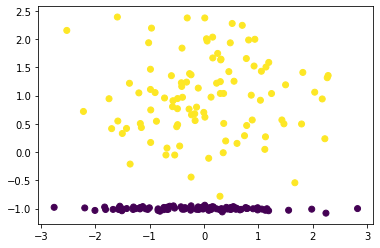

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y) # 特征值之间的关系

In [4]:
w = np.zeros((m,1))
eta = 0.01
epochs = 10000

for _ in range(epochs):
    np.random.shuffle(Xy)
    for i in range(n):
        x_i = Xy[i,:-1]
        y_i = Xy[i,-1:]
        
        if (y_i *x_i.dot(w))[0]<= 0:
            w = w + eta * (x_i * y_i).reshape(-1,1) # x_i为1x3；y_i为1x1;故为1x3;w为3x1
w

array([[0.0031971 ],
       [0.06210943],
       [0.05      ]])

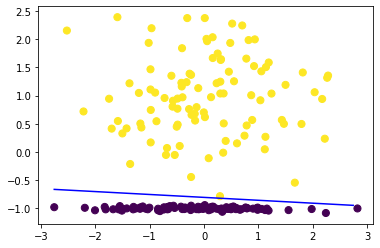

1.0

In [5]:
w1 = w[0]
w2 = w[1]
b = w[2]

x = np.arange(np.min(X), np.max(X), 0.1)
y_pred = -(w1*x+b)/w2
plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.plot(x, y_pred, 'b')
plt.show()

c = 0
for i in range(n):
    x_i = Xy[i,:-1]
    y_i = Xy[i,-1:]
    if (y_i *x_i.dot(w))[0]<= 0:
        c = c+1
score = (n-c)/n
score

## sklearn 感知机

In [6]:
from sklearn.linear_model import Perceptron
#定义感知机
clf = Perceptron(fit_intercept=False,shuffle=True)
#使用训练数据进行训练
clf.fit(X[:,:-1],y)

#得到训练结果，权重矩阵
w = clf.coef_

#超平面的截距
b = clf.intercept_

clf.score(X[:,:-1], y),w,b

(0.965, array([[0.21000057, 2.44289958]]), array([0.]))

In [7]:
y_pred = clf.predict(X[:,:-1])
y_pred

array([-1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1])

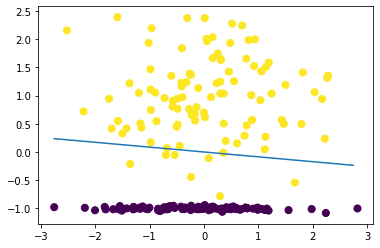

In [8]:
w1 = w[0,0]
w2 = w[0,1]

x = np.arange(np.min(X), np.max(X), 0.1)
y_pred = -(w1*x)/w2-b
plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.plot(x,y_pred)
plt.show()